This example is adapted from the Keras TensorFlow site. See [the original code here](https://www.tensorflow.org/tutorials/quickstart/beginner)

In [1]:
# using Keras in TensorFlow

import tensorflow as tf

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [5]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0403 - acc: 0.9878 - val_loss: 0.0785 - val_acc: 0.9800
Epoch 2/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0786 - val_acc: 0.9804
Epoch 3/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0365 - acc: 0.9886 - val_loss: 0.0808 - val_acc: 0.9803
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0813 - val_acc: 0.9815
Epoch 5/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0343 - acc: 0.9897 - val_loss: 0.0854 - val_acc: 0.9797
Epoch 6/20
60000/60000 [==============================] - 

In [25]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

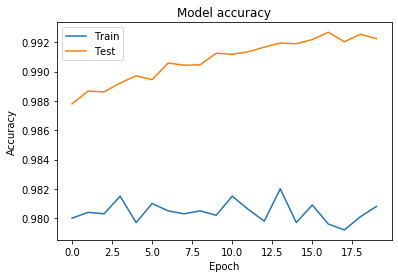

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.10173919826487718
Test accuracy: 0.9808
